In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import importlib

In [2]:
import cmdbench

SyntaxError: invalid syntax (core.py, line 272)

In [3]:
raw_benchmark = cmdbench.benchmark_command("node --expose-gc test.js", debugging = True)

NameError: name 'cmdbench' is not defined

In [4]:
raw_benchmark.get_single_iteration().gnu_time_results

NameError: name 'raw_benchmark' is not defined

In [5]:
raw_benchmark.results

NameError: name 'raw_benchmark' is not defined

In [10]:
gnu_time_max_perprocesss_memory = raw_benchmark.stats.gnu_time_results["Maximum resident set size (kbytes)"].mean * 1024
psutil_max_perprocesss_memory = raw_benchmark.stats.memory.max_perprocess.mean

print("Max GNU Time memory per process: %s" % gnu_time_max_perprocesss_memory)
print("Max psutil memory per process: %s" % psutil_max_perprocesss_memory)
if(gnu_time_max_perprocesss_memory == psutil_max_perprocesss_memory):
    print("As max memory per process from psutil is equal to /usr/bin/time, it's safe to use psutil for memory from now on")

AttributeError: 'dict' object has no attribute 'stats'

In [11]:
gnu_time_cpu_user_time_stats = raw_benchmark.stats.gnu_time_results["User time (seconds)"]
gnu_time_cpu_system_time_stats = raw_benchmark.stats.gnu_time_results["System time (seconds)"]

psutil_cpu_user_time_stats = raw_benchmark.stats.cpu.user_time
psutil_cpu_system_time_stats = raw_benchmark.stats.cpu.system_time

print("GNU Time cpu user time statistics: %s" % gnu_time_cpu_user_time_stats)
print("GNU Time cpu system time statistics: %s" % gnu_time_cpu_system_time_stats)
print()
print("psutil cpu user time statistics: %s" % psutil_cpu_user_time_stats)
print("psutil cpu system time statistics: %s" % psutil_cpu_system_time_stats)
print()
if(gnu_time_cpu_time >= psutil_cpu_time):
    print("As GNU Time total cpu time seems more accurate and more stable, we will use GNU Time total cpu time")

AttributeError: 'dict' object has no attribute 'stats'

In [12]:
process_stdout_data = raw_benchmark["process"]["stdout_data"]
process_stderr_data = raw_benchmark["process"]["stderr_data"]
print("STDOUT: \n\n%s" % process_stdout_data)
print("STDERR: \n\n%s" % process_stderr_data)
(raw_benchmark['process'])

STDOUT: 

Running master process

Running child process #1

Running child process #2

Running child process #4

Running child process #3

STDERR: 




{'stdout_data': 'Running master process\n\nRunning child process #1\n\nRunning child process #2\n\nRunning child process #4\n\nRunning child process #3\n',
 'stderr_data': '',
 'execution_time': 5.793}

In [13]:
results_sample_milliseconds = raw_benchmark["time_series"]["sample_milliseconds"]
results_cpu_percentages = raw_benchmark["time_series"]["cpu_percentages"]
results_memory_values = raw_benchmark["time_series"]["memory_bytes"]

In [14]:
execution_time_s = raw_benchmark["process"]["execution_time"]
# Should be equal
samples_per_s = len(results_sample_milliseconds) / execution_time_s

print("Execution time (ms): %s" % execution_time_s)
print("Samples per second: %s" % (samples_per_s))
print("Milliseconds per sample: %s" % ((1/samples_per_s)*1000))

Execution time (ms): 5.793
Samples per second: 159.15760400483342
Milliseconds per sample: 6.283080260303687


In [15]:
## DISK USAGE
# https://psutil.readthedocs.io/en/latest/#psutil.Process.io_counters
disk_io_counters_read = raw_benchmark["disk"]["io_counters"].read_chars
disk_io_counters_write = raw_benchmark["disk"]["io_counters"].write_chars
disk_io_counters_total = disk_io_counters_read + disk_io_counters_write

print(raw_benchmark["disk"]["io_counters"])
print("Total disk I/O (bytes): %s" %  disk_io_counters_total)
print("Total disk read (bytes): %s" %  disk_io_counters_read)
print("Total disk write (bytes): %s" %  disk_io_counters_write)

pio(read_count=32, write_count=15, read_bytes=0, write_bytes=1048576, read_chars=1058249, write_chars=1048757)
Total disk I/O (bytes): 2107006
Total disk read (bytes): 1058249
Total disk write (bytes): 1048757


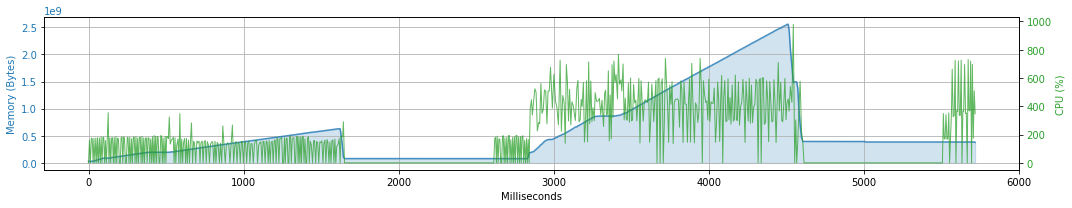

Total CPU time (seconds): 1.9700000000000002
Max used memory (bytes): 2556534784


In [16]:
# Compare with the second run of the same code

## CPU + MEMORY

# Set the figure's size
plt.rcParams["figure.figsize"] = (15,3)

# Data for plotting
x = results_sample_milliseconds
memory_y = results_memory_values
cpu_y = results_cpu_percentages


color = 'tab:blue'
fig, ax_memory = plt.subplots()
ax_memory.grid()
ax_memory.set_xlabel('Milliseconds')
ax_memory.set_ylabel('Memory (Bytes)', color=color)
ax_memory.plot(x, memory_y, color=color, alpha=0.8)
ax_memory.tick_params(axis='y', labelcolor=color)
plt.fill_between(x, memory_y, alpha=0.2, color=color)

color = 'tab:green'
ax_cpu = ax_memory.twinx()
ax_cpu.set_ylabel('CPU (%)', color=color)
ax_cpu.plot(x, cpu_y, color=color, alpha=0.75, linewidth=1)
ax_cpu.tick_params(axis='y', labelcolor=color)
#plt.fill_between(x, cpu_y, alpha=0.2, color=color)


plt.tight_layout()

# Delete figure file if it already exists and save the new one
figure_image_save_path = "resources/benchmark.png"
if os.path.exists(figure_image_save_path):
    os.remove(figure_image_save_path)
fig.savefig(figure_image_save_path)

plt.show()

print("Total CPU time (seconds): %s" % raw_benchmark["cpu"]["total_time"])
print("Max used memory (bytes): %s" % raw_benchmark["memory"]["max"])